Date                               2022-01-01  2022-03-01  2022-04-01  \
Specialty                                                               
Advertising                                 0           1           1   
Community / Social Media                    0           0           2   
Copywriting                                 0           0           1   
Fractional Leader (Ongoing Basis)           0           0           1   
No-and-Low Code                             0           0           1   
Strategy Advisor (Project based)            3           0           1   
UX/UI                                       0           0           1   

Date                               2022-05-01  
Specialty                                      
Advertising                                 0  
Community / Social Media                    1  
Copywriting                                 0  
Fractional Leader (Ongoing Basis)           0  
No-and-Low Code                             0  
Strate

<AxesSubplot:title={'center':'Active Experts on Projects or Past Projects - Breakdown by MoM and Category Since 2021 - Data Analysis Prepared by Nic Rayce'}, xlabel='Date', ylabel='Specialty'>

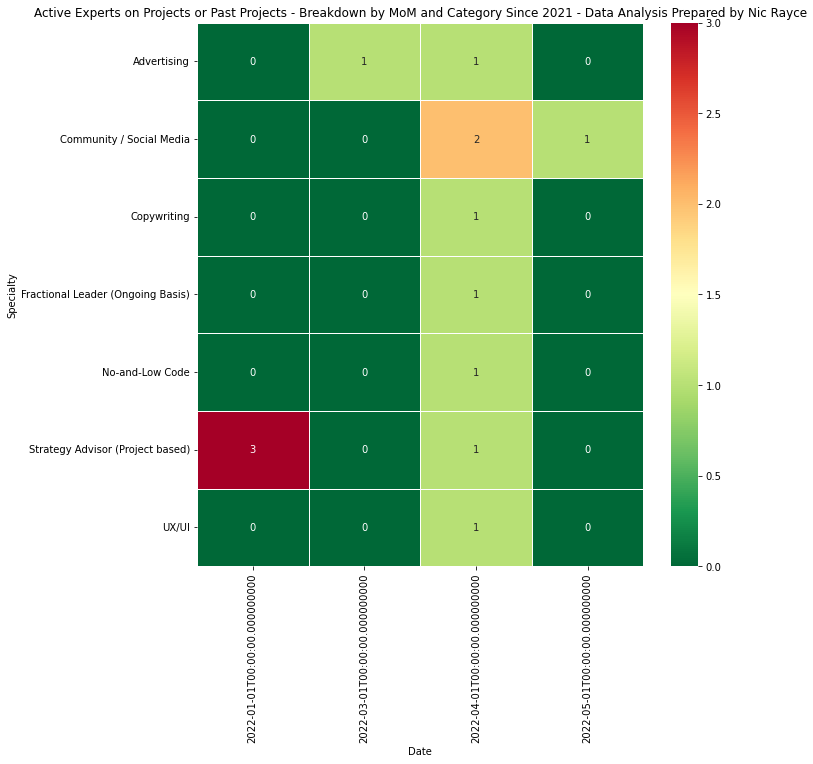

In [9]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT 
      date_trunc('month', experts.created) as "Date",
      specialties.name as "Specialty"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id
      INNER JOIN specialties 
      ON array_to_string(experts.new_specialties, '', '*') = specialties.id
      WHERE 
      (array_to_string(experts.new_specialties, '', '*') IS NOT NULL AND array_to_string(experts.new_specialties, '', '*') != '')
      AND date_trunc('month', experts.created) > '2021-12-31'
      AND selectsystems.record_id IS NOT NULL)
      
      SELECT count(*) as "Count", original."Specialty" as "Specialty", original."Date" as "Date"
      FROM original
      GROUP BY 2, 3
      ORDER BY 3
     
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
pivot = pd.pivot_table(data=df5, index='Specialty', columns='Date', values='Count', fill_value=0).sort_values(by=['Specialty'])
print(pivot)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Active Experts on Projects or Past Projects - Breakdown by MoM and Category Since 2021 - Data Analysis Prepared by Nic Rayce')
sns.heatmap(pivot, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=ax)

Specialty   Advertising  Community / Social Media  Copywriting  \
Date                                                             
2022-01-01            0                         0            0   
2022-03-01            1                         0            0   
2022-04-01            1                         2            1   
2022-05-01            0                         1            0   

Specialty   Fractional Leader (Ongoing Basis)  No-and-Low Code  \
Date                                                             
2022-01-01                                  0                0   
2022-03-01                                  0                0   
2022-04-01                                  1                1   
2022-05-01                                  0                0   

Specialty   Strategy Advisor (Project based)  UX/UI  
Date                                                 
2022-01-01                                 3      0  
2022-03-01                                 0

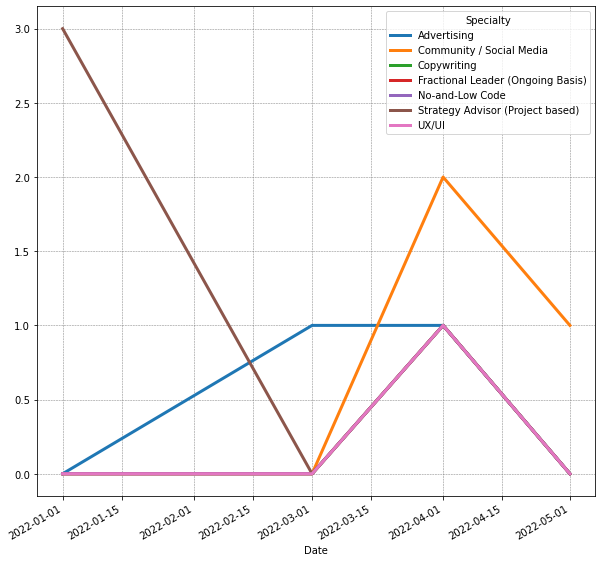

In [8]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT 
      date_trunc('month', experts.created) as "Date",
      specialties.name as "Specialty"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id
      INNER JOIN specialties 
      ON array_to_string(experts.new_specialties, '', '*') = specialties.id
      WHERE (array_to_string(experts.new_specialties, '', '*') IS NOT NULL AND array_to_string(experts.new_specialties, '', '*') != '')
      AND date_trunc('month', experts.created) > '2021-12-31'
      AND selectsystems.record_id IS NOT NULL)
      
      SELECT count(*) as "Count", original."Specialty" as "Specialty", original."Date" as "Date"
      FROM original
      GROUP BY 2, 3
      ORDER BY 3
     
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
pivot = pd.pivot_table(data=df5, index='Date', columns='Specialty', values='Count', fill_value=0).sort_values(by=['Date'])
print(pivot)
chart = pivot.plot(kind='line', linewidth=3.0, figsize=(10,10))
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

In [6]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)


    Percentage of Inactive Experts (%)                date_trunc
0                           100.000000 2022-06-01 00:00:00+00:00
1                            93.548387 2022-05-01 00:00:00+00:00
2                            83.606557 2022-04-01 00:00:00+00:00
3                            92.000000 2022-03-01 00:00:00+00:00
4                            92.307692 2022-02-01 00:00:00+00:00
5                            89.473684 2022-01-01 00:00:00+00:00
6                            97.619048 2021-12-01 00:00:00+00:00
7                            89.473684 2021-11-01 00:00:00+00:00
8                            76.923077 2021-10-01 00:00:00+00:00
9                            87.804878 2021-09-01 00:00:00+00:00
10                           72.500000 2021-08-01 00:00:00+00:00
11                           83.000000 2021-07-01 00:00:00+00:00
12                           46.666667 2021-06-01 00:00:00+00:00
13                           41.666667 2021-05-01 00:00:00+00:00
14                       

In [7]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)


    Percentage of Active Experts (%)                date_trunc
0                           0.000000 2022-06-01 00:00:00+00:00
1                           6.451613 2022-05-01 00:00:00+00:00
2                          16.393443 2022-04-01 00:00:00+00:00
3                           8.000000 2022-03-01 00:00:00+00:00
4                           7.692308 2022-02-01 00:00:00+00:00
5                          10.526316 2022-01-01 00:00:00+00:00
6                           2.380952 2021-12-01 00:00:00+00:00
7                          10.526316 2021-11-01 00:00:00+00:00
8                          23.076923 2021-10-01 00:00:00+00:00
9                          12.195122 2021-09-01 00:00:00+00:00
10                         27.500000 2021-08-01 00:00:00+00:00
11                         17.000000 2021-07-01 00:00:00+00:00
12                         53.333333 2021-06-01 00:00:00+00:00
13                         58.333333 2021-05-01 00:00:00+00:00
14                         62.500000 2021-04-01 00:00:0

    Percentage of Active Experts (%)         Registration Date
0                           0.000000 2022-06-01 00:00:00+00:00
1                           6.451613 2022-05-01 00:00:00+00:00
2                          16.393443 2022-04-01 00:00:00+00:00
3                           8.000000 2022-03-01 00:00:00+00:00
4                           7.692308 2022-02-01 00:00:00+00:00
5                          10.526316 2022-01-01 00:00:00+00:00
6                           2.380952 2021-12-01 00:00:00+00:00
7                          10.526316 2021-11-01 00:00:00+00:00
8                          23.076923 2021-10-01 00:00:00+00:00
9                          12.195122 2021-09-01 00:00:00+00:00
10                         27.500000 2021-08-01 00:00:00+00:00
11                         17.000000 2021-07-01 00:00:00+00:00
12                         53.333333 2021-06-01 00:00:00+00:00
13                         58.333333 2021-05-01 00:00:00+00:00
14                         62.500000 2021-04-01 00:00:0

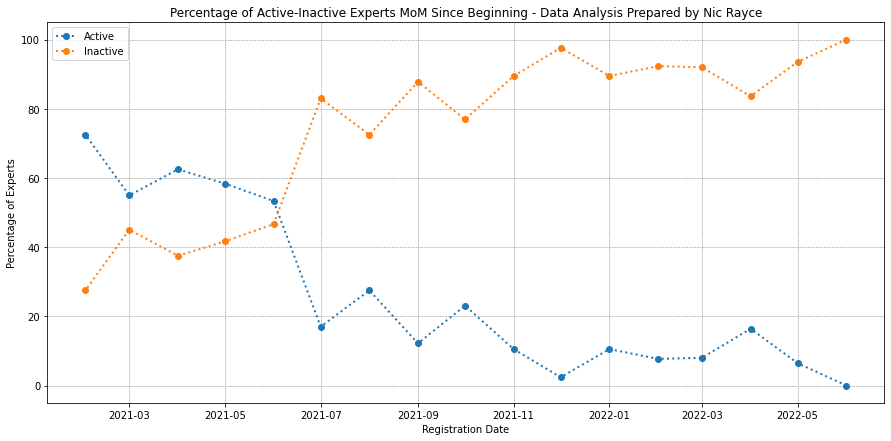

In [10]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)" , date_trunc('month', cast("source"."Date" as date)) as "Registration Date"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date)) as "Registration Date"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

# Define Data
xdata1=df5['Registration Date']
ydata1=df5['Percentage of Active Experts (%)']
xdata2=df6['Registration Date']
ydata2=df6['Percentage of Inactive Experts (%)']
    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active', 'Inactive'])
plt.title("Percentage of Active-Inactive Experts MoM Since Beginning - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
